In [1]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from time import time
from pathlib import Path
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

SELECT_YEAR = 2017

DATA_PATH = './data'
PLOT_PATH = './docs/plots/{}'.format(SELECT_YEAR)
Path(PLOT_PATH).mkdir(exist_ok=True)

DEFAULT_STEMMER = SnowballStemmer('english')
DEFAULT_STOPWORDS = stopwords.words('english')

In [2]:
# Data Read
data_file = '{}/df_lattes.pkl.xz'.format(DATA_PATH)
%time df = pd.read_pickle(data_file, compression='xz')
print('{} df shape'.format(df.shape))
df.head(10)

CPU times: user 387 ms, sys: 74 ms, total: 461 ms
Wall time: 491 ms
(172165, 3) df shape


,id,titulo,ano
0,101982954114164,3D reconstruction methods for digital preserva...,2014
1,101982954114164,3D Viewer Software Build Based on Scanned Synt...,2016
2,102488447573085,The Globalization Strategy of a High-Tech Mult...,1996
3,102488447573085,Information Systems as an Instrument of Qualit...,2000
4,102488447573085,The Experience of a Cardiology Unit in the Dev...,2002
5,102488447573085,Information Systems as an Instrument for Quali...,2002
6,102488447573085,Clustering and Categorization Applied to Crypt...,2006
7,102488447573085,Criptoanalisys Outwit using Context Sensitive ...,2016
8,102488447573085,Cryptographic Algorithm Identification Using M...,2016
9,103102694865890,Influence of baroclinic sistems in severe rain...,2011


In [3]:
# Seleciona Ano
df.drop(df.loc[df['ano']!=SELECT_YEAR].index, inplace=True)
df.drop(['ano'], axis=1, inplace=True)

# Concatena por Autor
df.sort_values(by=['id'], ignore_index=True, inplace=True)
#df = df.groupby('id', sort=False).titulo.apply(' '.join).reset_index(name='doc')

print('{} df shape'.format(df.shape))

(8652, 2) df shape


In [4]:
# Get the word count
df['w_count'] = df['titulo'].str.split().str.len()
df['w_count'].mean()

11.366851595006935

In [5]:
# Descriptive statistics for word count
df['w_count'].describe()

count    8652.000000
mean       11.366852
std         4.079088
min         1.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        48.000000
Name: w_count, dtype: float64

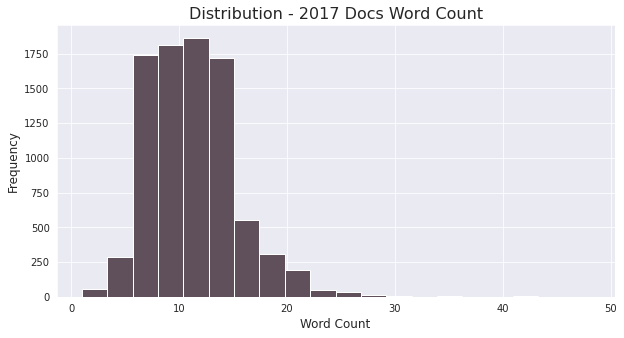

In [6]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df['w_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - {} Docs Word Count'.format(SELECT_YEAR), fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
#plt.yticks(np.arange(0, 2000, 200))
#plt.xticks(np.arange(0, 600, 50))

file_name = '/{}_hist'.format(SELECT_YEAR)

fig.savefig(
    PLOT_PATH + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

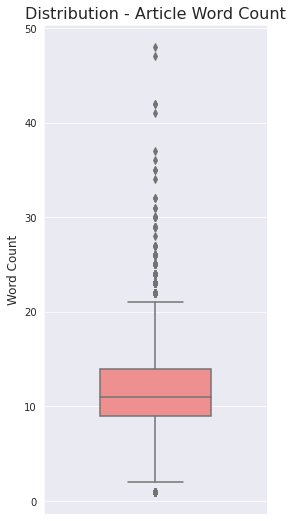

In [7]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    df['w_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)
#plt.yticks(np.arange(0, 2700, 100))

file_name = '/{}_box_plot'.format(SELECT_YEAR)

fig.savefig(
    PLOT_PATH + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [8]:
# Normalização
df.insert(2, 'clean', df['titulo'])

def remove_separation(doc):
    table = doc.maketrans('-/', '  ')
    return doc.translate(table)

def strip_ponct(doc):
    table = str.maketrans({key: None for key in string.punctuation})
    return doc.translate(table)

def normaliza(doc):
    doc = remove_separation(doc)
    doc = strip_ponct(doc)
    doc = doc.lower()
    return doc

t = time()
df['clean'] = df['clean'].apply(normaliza)

print('Time: {} mins'.format(round((time() - t) / 60, 2)))
df.head(10)

Time: 0.0 mins


,id,titulo,clean,w_count
0,104124422364023,Exploiting photo location and direction for cl...,exploiting photo location and direction for cl...,9
1,104124422364023,A gold-standard social media corpus for urban ...,a gold standard social media corpus for urban ...,8
2,104124422364023,A Framework for Spatial Analytics using Hetero...,a framework for spatial analytics using hetero...,9
3,105670521813027,Gene expression analysis in Musa acuminata dur...,gene expression analysis in musa acuminata dur...,12
4,105670521813027,Mitogenome sequence accuracy using different e...,mitogenome sequence accuracy using different e...,7
5,109837868064895,A study of equivalent electrical circuit fitti...,a study of equivalent electrical circuit fitti...,14
6,116792663386170,DYNAMICS OF CONNECTED VESSELS WITH RUNAWAY REA...,dynamics of connected vessels with runaway rea...,14
7,116792663386170,VLE BASED DYNAMIC SIMULATION OF A TRICKLE-BED ...,vle based dynamic simulation of a trickle bed ...,13
8,116792663386170,SOLUBILITY BEHAVIOR OF GAMMA-VALEROLACTONE + N...,solubility behavior of gamma valerolactone n ...,9
9,116792663386170,Removal of amoxicillin from water by adsorptio...,removal of amoxicillin from water by adsorptio...,25


In [9]:
# Stopwords / Lemma
def remove_stopwords(doc, stop_words=DEFAULT_STOPWORDS):
    words = [w for w in doc if not w in stop_words]
    return words

def stem_text(doc, stemmer=DEFAULT_STEMMER):
    words = [stemmer.stem(w) for w in doc]
    return words

def preprocess(doc):
    doc = word_tokenize(doc)
    doc = remove_stopwords(doc)
    doc = stem_text(doc)
    doc = [w for w in doc if len(w) > 1]
    return doc

t = time()
df['clean'] = df['clean'].apply(preprocess)
print('Time: {} mins'.format(round((time() - t) / 60, 2)))
df.head(10)

Time: 0.06 mins


,id,titulo,clean,w_count
0,104124422364023,Exploiting photo location and direction for cl...,"[exploit, photo, locat, direct, cluster, base,...",9
1,104124422364023,A gold-standard social media corpus for urban ...,"[gold, standard, social, media, corpus, urban,...",8
2,104124422364023,A Framework for Spatial Analytics using Hetero...,"[framework, spatial, analyt, use, heterogen, d...",9
3,105670521813027,Gene expression analysis in Musa acuminata dur...,"[gene, express, analysi, musa, acuminata, comp...",12
4,105670521813027,Mitogenome sequence accuracy using different e...,"[mitogenom, sequenc, accuraci, use, differ, el...",7
5,109837868064895,A study of equivalent electrical circuit fitti...,"[studi, equival, electr, circuit, fit, electro...",14
6,116792663386170,DYNAMICS OF CONNECTED VESSELS WITH RUNAWAY REA...,"[dynam, connect, vessel, runaway, reaction, ri...",14
7,116792663386170,VLE BASED DYNAMIC SIMULATION OF A TRICKLE-BED ...,"[vle, base, dynam, simul, trickl, bed, reactor...",13
8,116792663386170,SOLUBILITY BEHAVIOR OF GAMMA-VALEROLACTONE + N...,"[solubl, behavior, gamma, valerolacton, tetrad...",9
9,116792663386170,Removal of amoxicillin from water by adsorptio...,"[remov, amoxicillin, water, adsorpt, onto, act...",25


In [10]:
# Remove Noise
noise_file = open('{}/extra/noise.txt'.format(DATA_PATH),'r')
noise = noise_file.read().splitlines()

def remove_noise(doc):
    words = [w for w in doc if not w in noise]
    return words

t = time()
df['clean'] = df['clean'].apply(remove_noise)

print('Time: {} mins'.format(round((time() - t) / 60, 2)))

Time: 0.0 mins


In [11]:
# Get the top 20 most common words among all the articles
p_text = df['clean']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,base,1187
1,use,1099
2,model,835
3,system,787
4,network,744
5,analysi,699
6,data,581
7,approach,515
8,studi,464
9,learn,431


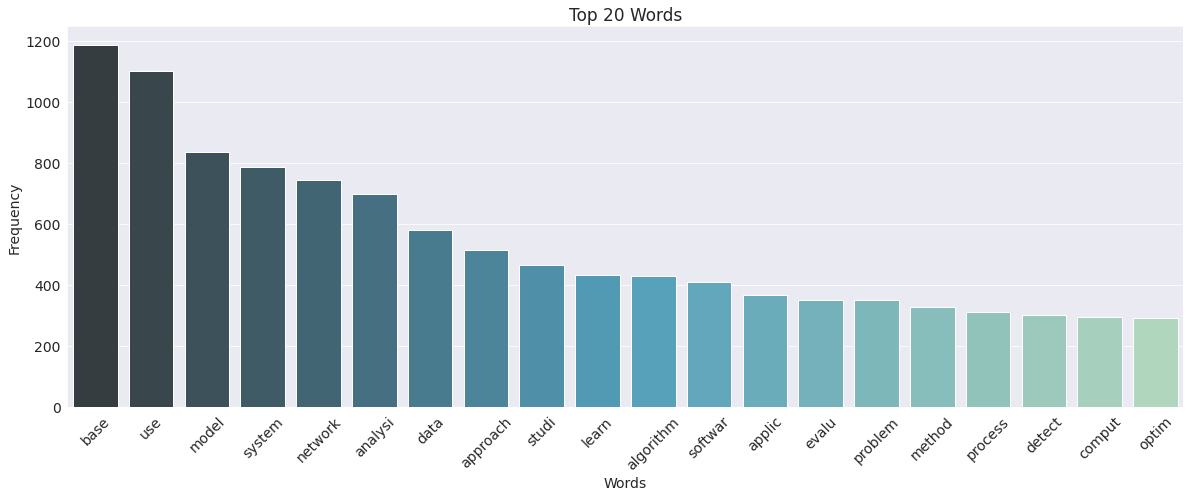

In [12]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

file_name = '/{}_top_words'.format(SELECT_YEAR)

fig.savefig(
    PLOT_PATH + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [13]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

8649

In [14]:
# Save
path = '{}/'.format(DATA_PATH)
Path(path).mkdir(exist_ok=True)

pre_file = '{}/{}_lattes.pkl.xz'.format(DATA_PATH, SELECT_YEAR)
%time df.to_pickle(pre_file, compression='xz')

txt_file = '{}/{}_lattesPre.txt'.format(DATA_PATH, SELECT_YEAR)
df['clean'] = df['clean'].apply(lambda x: ' '.join(x))
df.to_csv(txt_file, index=None, header=False, columns=['clean'])

CPU times: user 1.35 s, sys: 49.8 ms, total: 1.4 s
Wall time: 1.42 s
